<a href="https://colab.research.google.com/github/igorlysov/pokeGAN/blob/main/gan_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Демонстрация работы DCGAN

В этом ноутбуке можно посмотреть как генерирует обученная мной DCGAN на датасете из изображений покемонов 

Процесс обучения и реализации можно посмотреть в другом ноутбуке: 
https://colab.research.google.com/github/igorlysov/pokeGAN/blob/main/gan.ipynb#

(Обучал не в Colab)

In [ ]:
!git clone https://github.com/igorlysov/pokeGAN

Cloning into 'pokeGAN'...
remote: Enumerating objects: 3432, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 3432 (delta 6), reused 28 (delta 6), pack-reused 3404
Receiving objects: 100% (3432/3432), 103.28 MiB | 34.40 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
import torch
import torch.nn as nn
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torchvision.datasets as Dataset
import torchvision.transforms as transforms

In [ ]:
class Generator(nn.Module):
    def __init__(self, ngpu=0):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, nf_G*8, kernel_size=4,
                               stride=1, padding=0, bias=False),
            nn.BatchNorm2d(nf_G*8),
            nn.ReLU(True),

            nn.ConvTranspose2d(nf_G*8, nf_G*4, kernel_size=4,
                               stride=2, padding=1, bias=False),
            nn.BatchNorm2d(nf_G*4),
            nn.ReLU(True),

            nn.ConvTranspose2d(nf_G*4, nf_G*2, kernel_size=4,
                               stride=2, padding=1, bias=False),
            nn.BatchNorm2d(nf_G*2),
            nn.ReLU(True),

            nn.ConvTranspose2d(nf_G*2, nf_G, kernel_size=4,
                               stride=2, padding=1, bias=False),
            nn.BatchNorm2d(nf_G),
            nn.ReLU(True),

            nn.ConvTranspose2d(nf_G, n_channels, kernel_size=4,
                               stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

In [ ]:
latent_dim, nf_G, n_channels = 100, 64, 3
device = torch.device('cpu')

generator = Generator()
generator.load_state_dict(torch.load('/content/pokeGAN/weights/version3/G_3.pth', map_location=device))

number_of_pics = 64
fixed_noise = torch.randn(number_of_pics, latent_dim, 1, 1, device=device)
img_list = []

with torch.no_grad():
    fake = generator(fixed_noise).detach().cpu()
img_list.append(vutils.make_grid(fake, padding=2))

In [ ]:
dataset = Dataset.ImageFolder(root="/content/pokeGAN/images",
                              transform=transforms.Compose([
                               transforms.Resize(size=[64,64]),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(degrees=[0.2, 0.8]),
                               transforms.ToTensor()
                           ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

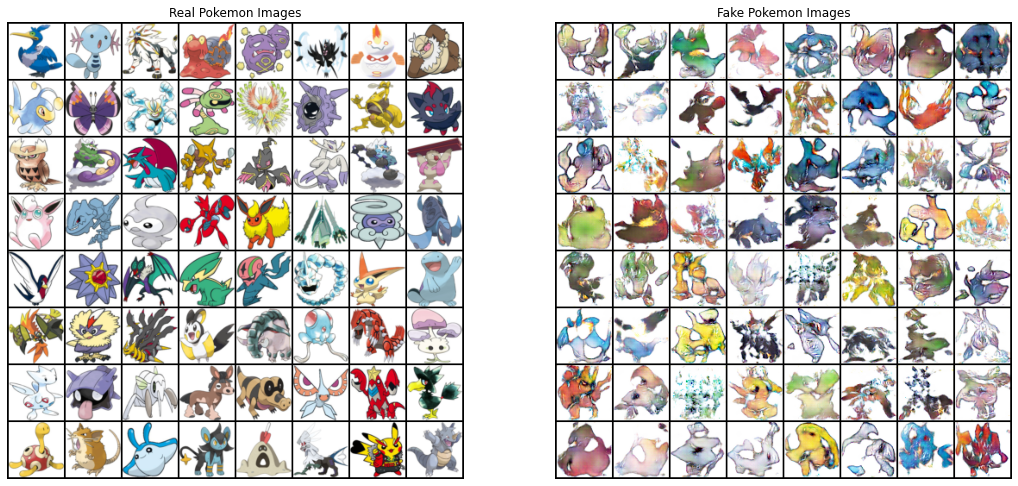

In [56]:
real_batch, _ = next(iter(dataloader))

plt.figure(figsize=(18,18))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Pokemon Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[:number_of_pics], padding=2, normalize=True).cpu(),(1,2,0)))


plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Fake Pokemon Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))  
plt.show()